<a href="https://colab.research.google.com/github/rae-gh/colab-analyses/blob/main/TrivialDivergence_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Trivial Divergence</h1>
<h3>Associations in multidimensional data</h3>
(c) Rachel Alcraft 2024


There are 11 cells to run, you only need to edit the first to change the pdbs or geometric measures:
<hr/>
</br> 1. Import the required librarires
</br> 2. Sanity check - 1 dimensional Kullback-Leibler divergence
</br>3-5. Some 2d data with visualisation
</br>6. Includes a p-value calculation with 1000 iterations


<hr/>

In [ ]:
# CELL 1
# Need to import libraries
try:#runtime gets refreshed so reinstall of non standard libraries may be necessary
  import google.colab
  !pip install matplotlib
  !pip install seaborn
  !pip install pandas
  !pip install -i https://test.pypi.org/simple/ nDimAssociations-pkg-RachelAlcraft
except:
  pass

Looking in indexes: https://test.pypi.org/simple/


In [ ]:
# CELL 2
# This replicates the calculation for Kullback-Leibler on wikipedia
# https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence
from nDimAssociations import AlcraftWilliamsAssociation as awa
import pandas as pd

dataA = pd.DataFrame(data={'col1':[0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2]})
dataB = pd.DataFrame(data={'col1':[0,1,2]})
awassoc = awa.AlcraftWilliamsAssociation(dataA,dataB,method='k-l',bins=3)# p->Q, reverse dataA/B inputs from Q->P
assoc = awassoc.addAssociation(['col1'])
# The association data container has: cols, matA, matDiff, matB, metric
stat = round(assoc.metric,7)
print(stat)


0.0852996


Highly associated data= 0.7224


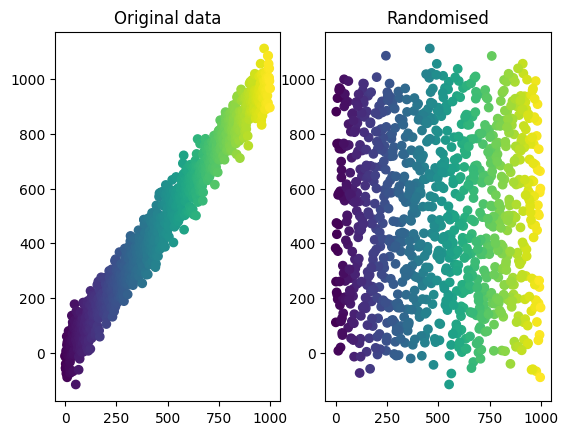

In [ ]:
# CELL 3
# Something a bit more visual - A line correlation
from nDimAssociations import AlcraftWilliamsAssociation as awa
import math
import matplotlib.pyplot as plt
import numpy as np

x = []
lineC = []
for i in range(1000):
    x.append(i)
    lineC.append(i + np.random.normal(0,50))
data = pd.DataFrame(data={'col1':x,'col2':lineC})
awassoc = awa.AlcraftWilliamsAssociation(data,bins=10)
data_randomised = awassoc.getShuffledData(data,['col1','col2'])
assoc = awassoc.addAssociation(['col1','col2'])
print('Highly associated data=',round(assoc.metric,5))

fig,axs = plt.subplots(1,2)
ax1 = axs[0]
ax2 = axs[1]

for ax,df,title in [[ax1,data,'Original data'],[ax2,data_randomised,'Randomised']]:
  #ax.grid(b=True,which='major',color='Gainsboro',linestyle='-')
  ax.set_axisbelow(True)
  g1 = ax.scatter(df['col1'], df['col2'], c=df['col1'], marker='o',cmap='viridis',alpha=1);
  ax.title.set_text(title)



Highly associated data= 0.6448


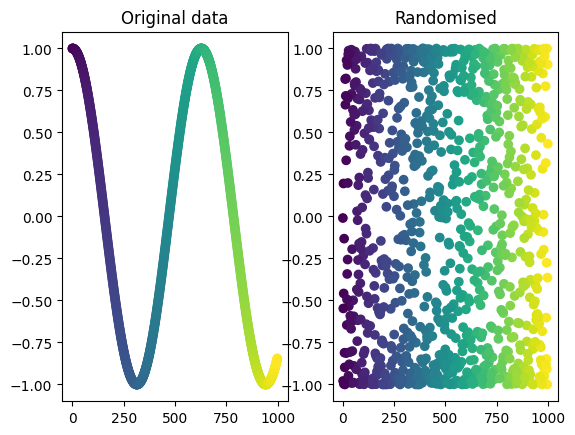

In [ ]:
# CELL 4
# Something a bit more visual - A non linear correlation
from nDimAssociations import AlcraftWilliamsAssociation as awa
import math
import matplotlib.pyplot as plt

x = []
lineC = []
for i in range(1000):
    x.append(i)
    lineC.append(math.cos(i/100))
data = pd.DataFrame(data={'col1':x,'col2':lineC})
awassoc = awa.AlcraftWilliamsAssociation(data,bins=10)
data_randomised = awassoc.getShuffledData(data,['col1','col2'])
assoc = awassoc.addAssociation(['col1','col2'])
print('Highly associated data=',round(assoc.metric,5))

fig,axs = plt.subplots(1,2)
ax1 = axs[0]
ax2 = axs[1]

for ax,df,title in [[ax1,data,'Original data'],[ax2,data_randomised,'Randomised']]:
  #ax.grid(b=True,which='major',color='Gainsboro',linestyle='-')
  ax.set_axisbelow(True)
  g1 = ax.scatter(df['col1'], df['col2'], c=df['col1'], marker='o',cmap='viridis',alpha=1);
  ax.title.set_text(title)



Low association in data= 0.1001


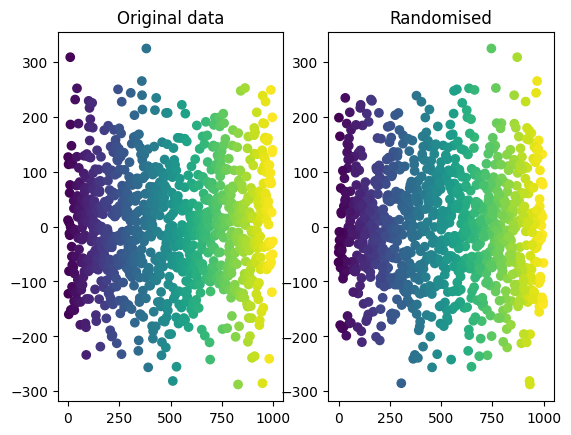

In [ ]:
# CELL 5
# Something a bit more visual - very little association
from nDimAssociations import AlcraftWilliamsAssociation as awa
import math
import matplotlib.pyplot as plt

x = []
lineC = []
for i in range(1000):
    x.append(i)
    lineC.append(np.random.normal(0,100))
data = pd.DataFrame(data={'col1':x,'col2':lineC})
awassoc = awa.AlcraftWilliamsAssociation(data,bins=10)
data_randomised = awassoc.getShuffledData(data,['col1','col2'])
assoc = awassoc.addAssociation(['col1','col2'])
print('Low association in data=',round(assoc.metric,5))

fig,axs = plt.subplots(1,2)
ax1 = axs[0]
ax2 = axs[1]

for ax,df,title in [[ax1,data,'Original data'],[ax2,data_randomised,'Randomised']]:
  #ax.grid(b=True,which='major',color='Gainsboro',linestyle='-')
  ax.set_axisbelow(True)
  g1 = ax.scatter(df['col1'], df['col2'], c=df['col1'], marker='o',cmap='viridis',alpha=1);
  ax.title.set_text(title)



Highly associated data= 0.7227
P-value= 0.0


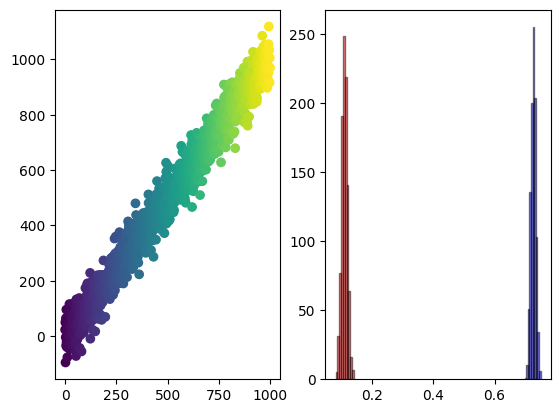

In [ ]:
# CELL 6
# This is as above but it includes a p-value calculation
# As this is distribution free the p-value has to be calculated as a simulation for every association
# The default value is 1000 resamplings so it takes a bit of time

from nDimAssociations import AlcraftWilliamsAssociation as awa
import math
import matplotlib.pyplot as plt
import numpy as np

x = []
lineC = []
for i in range(1000):
    x.append(i)
    lineC.append(i + np.random.normal(0,50))
data = pd.DataFrame(data={'col1':x,'col2':lineC})
awassoc = awa.AlcraftWilliamsAssociation(data,bins=10,piters=1000)
assoc = awassoc.addAssociation(['col1','col2'])
print('Highly associated data=',round(assoc.metric,5))
print('P-value=',round(assoc.pvalue,5))

fig,axs = plt.subplots(1,2)
ax1 = axs[0]
ax2 = axs[1]
#ax1.grid(b=True,which='major',color='Gainsboro',linestyle='-')
ax1.set_axisbelow(True)
g1 = ax1.scatter(data['col1'], data['col2'], c=data['col1'], marker='o',cmap='viridis',alpha=1);
ax.title.set_text('Original data')
g = plt.hist(assoc.phistA, edgecolor='k', bins=10, color='b', alpha=0.5)
g = plt.hist(assoc.phistB, edgecolor='k', bins=10, color='r', alpha=0.5)
